# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
#import math
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [ ]:
#ЗАДАНИЕ Lesson1 
#по ML - Предсказать параметр MEDV из данного датасета
#модель линейной регрессии
#разбить train/test на 0.75/0.25

In [2]:
df = pd.read_csv('housing.csv',  sep=',')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [3]:
#Незаполненных значений в df нет. 
df.isnull().sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
#посмотрим на нулевые значения df
np.count_nonzero(df, axis=0)

array([506, 134, 506,  35, 506, 506, 506, 506, 506, 506, 506, 506, 506,
       506], dtype=int64)

In [7]:
100-(np.count_nonzero(df['ZN'] , axis=0)/len(df['ZN'])*100)#  под вопросом исключение признака из расчета

73.51778656126481

In [8]:
100-(np.count_nonzero(df['CHAS'] , axis=0)/len(df['ZN'])*100)#  под вопросом исключение признака из расчета

93.08300395256917

In [3]:
X = df.iloc[:, :-1].copy()
y = df.iloc[:, -1].copy()

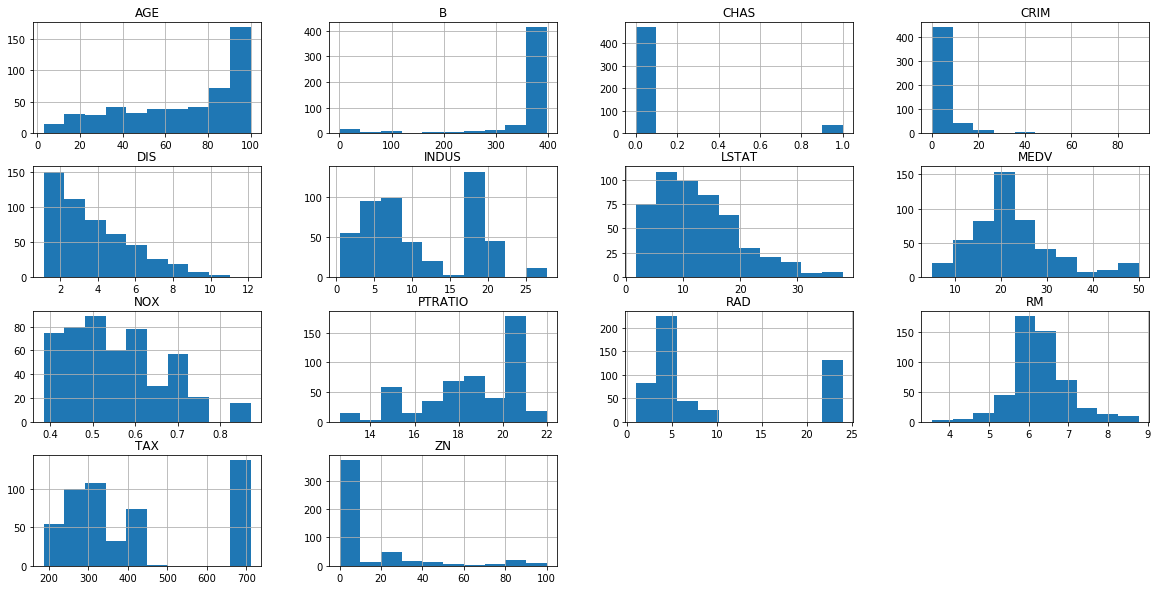

In [5]:
#Визуализируем распределения признаков в датасете
_ = df.hist(df.columns, figsize=(20, 10))

#Посмотрим на распределение признаков на начальном этапе работы с данными  X.
#-на распределиение;
# -на выбросы- обратить внимание на признаки B, CHAS, ZN, RAD.
#Визуализация распределения признаков  пригодится в дальнейшем в том числе, если будем принимать решение 
#о  кросс-валидации данных.

#*значение/способ нахождения значения для заполнения даных по выбросам, будет приниматься экспертно. 
# На текущий момент принимаем решение оставить все признаки

In [10]:
#_ = df.boxplot(df.columns, figsize=(20, 10))

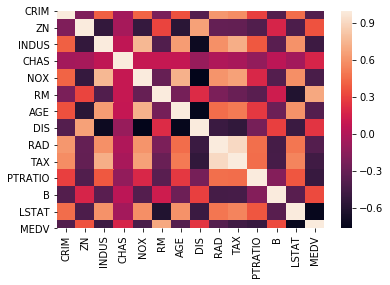

In [11]:
#Посмотрим:
#-как скоррелированы данные Х;
#-есть ли влияние данных X на  целевой taget -y  
import seaborn as sns

sns.heatmap(df.corr())

In [79]:
#Между  признаками  RAD И TAX наблюдается сильная корреляция. 
#По влиянию на  целевой taget y - наблюдается отрицательная корреляция с признаком LSTAT(-0.74).
# Посмотрим в числовом виде.

df_corr=df.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
#Сделаем предсказание: какие факторы окажутся наиболее значимыми и в какую сторону?

In [14]:
X = df.iloc[:, :-1].copy()
y = df.iloc[:, -1].copy()
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
#np.random.seed(123)
#Разобьём выборку на train и test в соотношении 75/25.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=123)

In [16]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
335,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82
170,1.20742,0.0,19.58,0.0,0.605,5.875,94.6,2.4259,5.0,403.0,14.7,292.29,14.43
241,0.10612,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74,21.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60


In [17]:
col=list(X_train.columns) # заготовка для дальнейшего анализа


In [18]:
col1=df[['RAD','TAX', 'LSTAT']] # заготовка для дальнейшего анализа
col1=list(col1.columns) 


In [19]:
#Выполним нормировку данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#Обучим линейную регрессию и подсчитаем её качество на тесте.
model = LinearRegression()
model.fit(X_train, y_train)
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [21]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))
print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

Train MSE:  21.380655966729467
Test MSE:  24.768530968608644
Train MAE:  3.2364529192799996
Test MAE:  3.43774960084653


In [ ]:
#Вывод:На тестовой выборке метрики качества линейной регрессии немного хуже, чем на тренировочной выборке, но не критично.
#Это ожидаемо. При наличии всего 13 признаков и относительно небольшого ряда(506 значений) мы, возможно,
#получили оптимальный вариант с фиксированным набором данных random_state=123

#Посмотрим на веса


<BarContainer object of 13 artists>

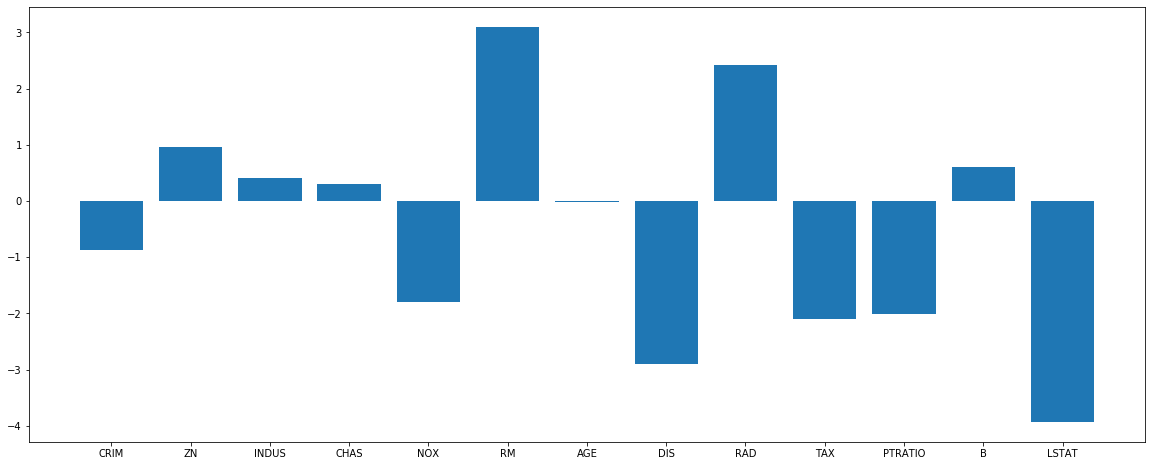

In [22]:
#Визуализируем получившиеся веса
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

In [ ]:
#Следует отметить, что у сильнокоррелируемых признаков  RAD и TAX достаточно большие веса. 
#Есть предположение, что совместно они  могут внести отрицательный вклад(например,если на тесте они не коррелируют).
#Кроме того, у признака LSTAT наблюдается самый большой вес и отрицательная корреляция (-0.73) с целевым taget y.

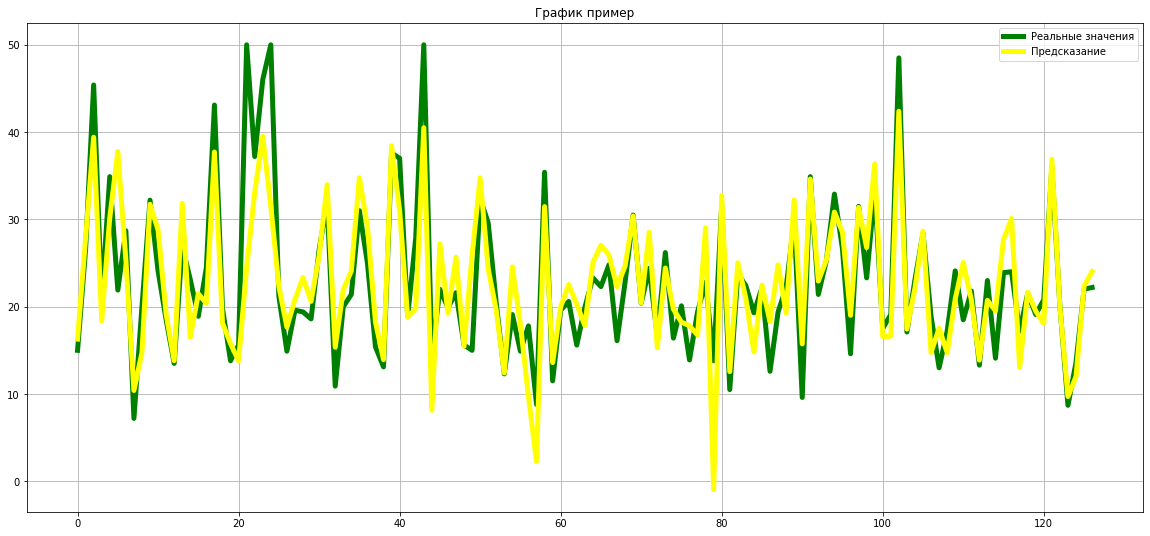

In [27]:
#Посмотрим, как обучилась модель
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "green",linewidth=5, label='Реальные значения')
plt.plot(y_test_prediction, "yellow",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.title("График пример")
plt.grid(True)
plt.show()

In [ ]:
#Мы возьмем за базовый результат тот, который получился выше,но далее поэксперементируем на этом же наборе данных random_state=123, 
#чтобы показать, что при ограниченном количестве признаков и  относительно коротких рядах  результат принципиально не изменится
#Удалим по очереди  2  сильно коррелирующих между собой признака RAD и TAX.
#Удалим признак с сильной отрицательной коррел c taget y- LSTAT
# Во все эксперименты подаем ОДИНАКОВЫЙ НАБОР ДАННЫХ random_state=123.

In [28]:
#Попробуем исключить признак RAD, так как он сильно коррелирует с признаком TAX и имеет большой вес среди признаков.Посмотрим,
#повлияет  ли эта процедура  на качество модели линейной регрессии.
X1 = X.drop(['RAD'], axis=1) 
X1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


In [29]:
y1 = df.iloc[:, -1].copy()


In [30]:
#np.random.seed(123)
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.75,random_state=123)
y1_train.shape, y1_test.shape

((379,), (127,))

In [31]:
X1_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
335,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,224.0,20.2,396.90,8.01
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,403.0,14.7,396.90,26.82
170,1.20742,0.0,19.58,0.0,0.605,5.875,94.6,2.4259,403.0,14.7,292.29,14.43
241,0.10612,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,300.0,16.6,394.62,12.40
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,666.0,20.2,393.74,21.78
...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,276.0,18.0,393.53,3.57
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,666.0,20.2,396.21,18.68
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,287.0,19.6,396.90,7.70
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,666.0,20.2,396.90,23.60


In [32]:
#Выполним нормировку данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [33]:
#Обучим линейную регрессию и подсчитаем её качество на тесте.
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_train_prediction = model1.predict(X1_train)
y1_test_prediction = model1.predict(X1_test)

In [34]:
print('Train MSE: ', mean_squared_error(y1_train, y1_train_prediction))
print('Test MSE: ', mean_squared_error(y1_test, y1_test_prediction))
print('Train MAE: ', mean_absolute_error(y1_train, y1_train_prediction))
print('Test MAE: ', mean_absolute_error(y1_test, y1_test_prediction))

Train MSE:  22.214761078811982
Test MSE:  26.155696213652583
Train MAE:  3.27614616349287
Test MAE:  3.4968295968453718


In [159]:
# Результат немного ухудшился. Исключение признака RAD не повлияло на улучшение  модели линейной регрессии.

<BarContainer object of 12 artists>

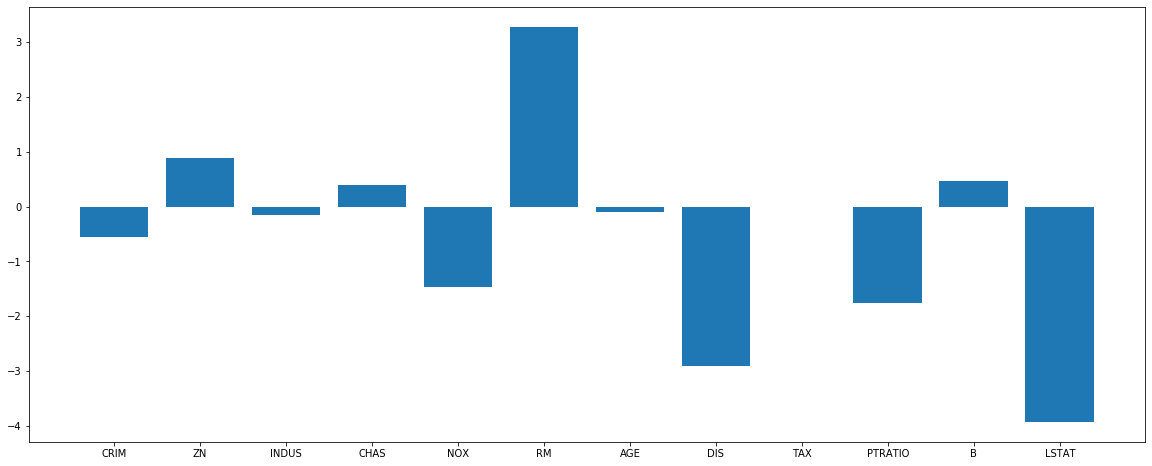

In [35]:
plt.figure(figsize=(20, 8))
plt.bar(X1.columns, model1.coef_)

In [36]:
 model1.coef_

array([-0.55560666,  0.8834711 , -0.16040642,  0.39576383, -1.46152515,
        3.28133606, -0.10210327, -2.91039365, -0.01249949, -1.75784834,
        0.46515413, -3.93197442])

In [ ]:
#Наблюдаем, что с удалением признака RAD веса признаков изменились. На результат повлияет совокупность полученных
#весов признаков.

In [37]:
#Теперь попробуем исключить признак TAX, так как он сильно коррелирует с признаком RAD и имеет большой вес среди признаков.
#Посмотрим, повлияет  ли эта процедура  на улучшение качества модели линейной регрессии.
X2 = X.drop(['TAX'], axis=1) 
X2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


In [38]:
y2 = df.iloc[:, -1].copy()


In [39]:
#np.random.seed(123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.75,random_state=123)
y2_train.shape, y2_test.shape

((379,), (127,))

In [40]:
X2_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
335,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,20.2,396.90,8.01
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,14.7,396.90,26.82
170,1.20742,0.0,19.58,0.0,0.605,5.875,94.6,2.4259,5.0,14.7,292.29,14.43
241,0.10612,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6.0,16.6,394.62,12.40
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,20.2,393.74,21.78
...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,18.0,393.53,3.57
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,20.2,396.21,18.68
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,19.6,396.90,7.70
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,20.2,396.90,23.60


In [42]:
#Выполним нормировку данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [43]:
#Обучим линейную регрессию и подсчитаем её качество на тесте.
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_train_prediction = model2.predict(X2_train)
y2_test_prediction = model2.predict(X2_test)

In [44]:
print('Train MSE: ', mean_squared_error(y2_train, y2_train_prediction))
print('Test MSE: ', mean_squared_error(y2_test, y2_test_prediction))

print('Train MAE: ', mean_absolute_error(y2_train, y2_train_prediction))
print('Test MAE: ', mean_absolute_error(y2_test, y2_test_prediction))

Train MSE:  21.885968511669844
Test MSE:  25.178233318280004
Train MAE:  3.281658305665391
Test MAE:  3.4611121388237995


In [ ]:
# Результат немного улучшился.Но немного хуже исходного расчета.
#Исключение признака TAX не повлияло на улучшение  модели линейной регрессии.

<BarContainer object of 12 artists>

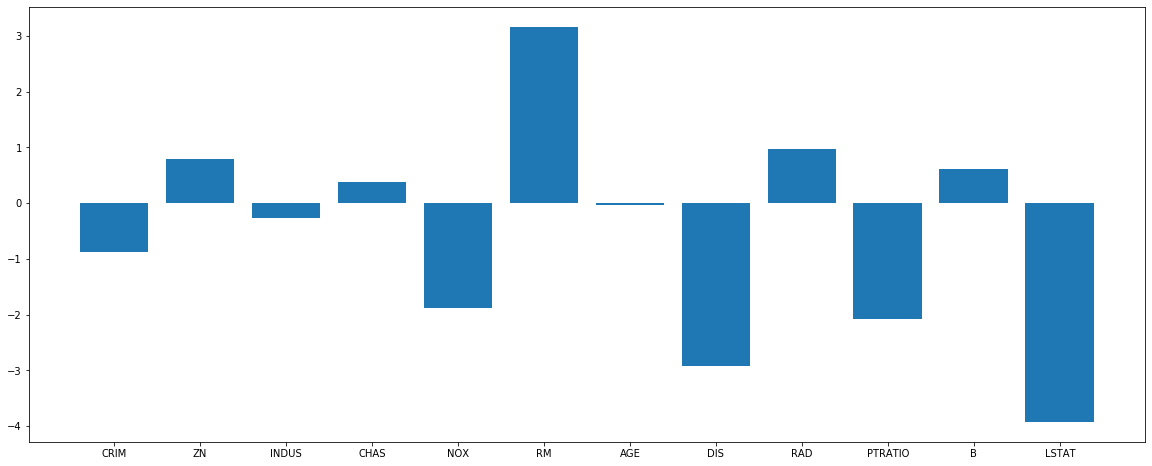

In [45]:
plt.figure(figsize=(20, 8))
plt.bar(X2.columns, model2.coef_)

In [ ]:
#Наблюдаем, что с удалением признака TAX веса признаков изменились. На результат повлияет совокупность полученных
#весов признаков.

In [ ]:
#вывод. Удаление по одному из признаков коррелирующих между собой в данном случае  
# не повлияло на улучшение модели линейной регрессии.


In [ ]:
# Попробуем еще поэксперементировать. Удалим  признак  LSTAT. 
#По влиянию на  целевой taget y - наблюдается отрицательная корреляция с признаком LSTAT(-0.74).

In [46]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
X3 = X.drop(['LSTAT'], axis=1) 
X3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [48]:
y3 = df.iloc[:, -1].copy()


In [49]:
#np.random.seed(123)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=0.75,random_state=123)
y3_train.shape, y3_test.shape

((379,), (127,))

In [50]:
X3_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
335,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90
170,1.20742,0.0,19.58,0.0,0.605,5.875,94.6,2.4259,5.0,403.0,14.7,292.29
241,0.10612,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6.0,300.0,16.6,394.62
379,17.86670,0.0,18.10,0.0,0.671,6.223,100.0,1.3861,24.0,666.0,20.2,393.74
...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21
322,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90


In [51]:
#Выполним нормировку данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

In [52]:
#Обучим линейную регрессию и подсчитаем её качество на тесте.
model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y3_train_prediction = model3.predict(X3_train)
y3_test_prediction = model3.predict(X3_test)

In [54]:
print('Train MSE: ', mean_squared_error(y3_train, y3_train_prediction))
print('Test MSE: ', mean_squared_error(y3_test, y3_test_prediction))

print('Train MAE: ', mean_absolute_error(y3_train, y3_train_prediction))
print('Test MAE: ', mean_absolute_error(y3_test, y3_test_prediction))

Train MSE:  26.525068097620807
Test MSE:  28.094213010957795
Train MAE:  3.368185428213285
Test MAE:  3.362306537984108


In [55]:
#  Исключение признака LSTAT повлияло на ухудшение  модели линейной регоессии. Это значимый признак для модели.
# Его не исключать.


<BarContainer object of 11 artists>

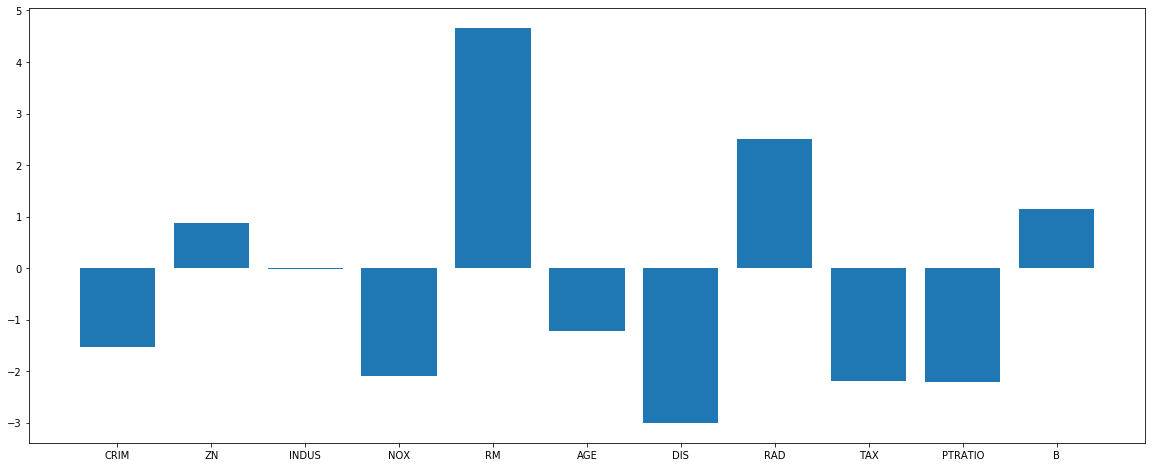

In [46]:
plt.figure(figsize=(20, 8))
plt.bar(X3.columns, model3.coef_)

In [ ]:
# Так же был проведен  эксперемент с признаком CHAS он на 93% ==0, но при его удалении на наборе данных random_state=123
# качество модели не улучшилось. Решено было его  оставить.

In [ ]:
#Но все таки предположим, что два признака RED И TAX совместно  негативно влияют  на модель.
#что является предпосылкой  применения регуляризации Ridge. Так как у нас небольшой объем значений и все признаки нужны.
#Первоначальный расчет дал лучший результат. 
#Набор данных random_state=123


In [57]:
from sklearn.linear_model import Ridge, Lasso

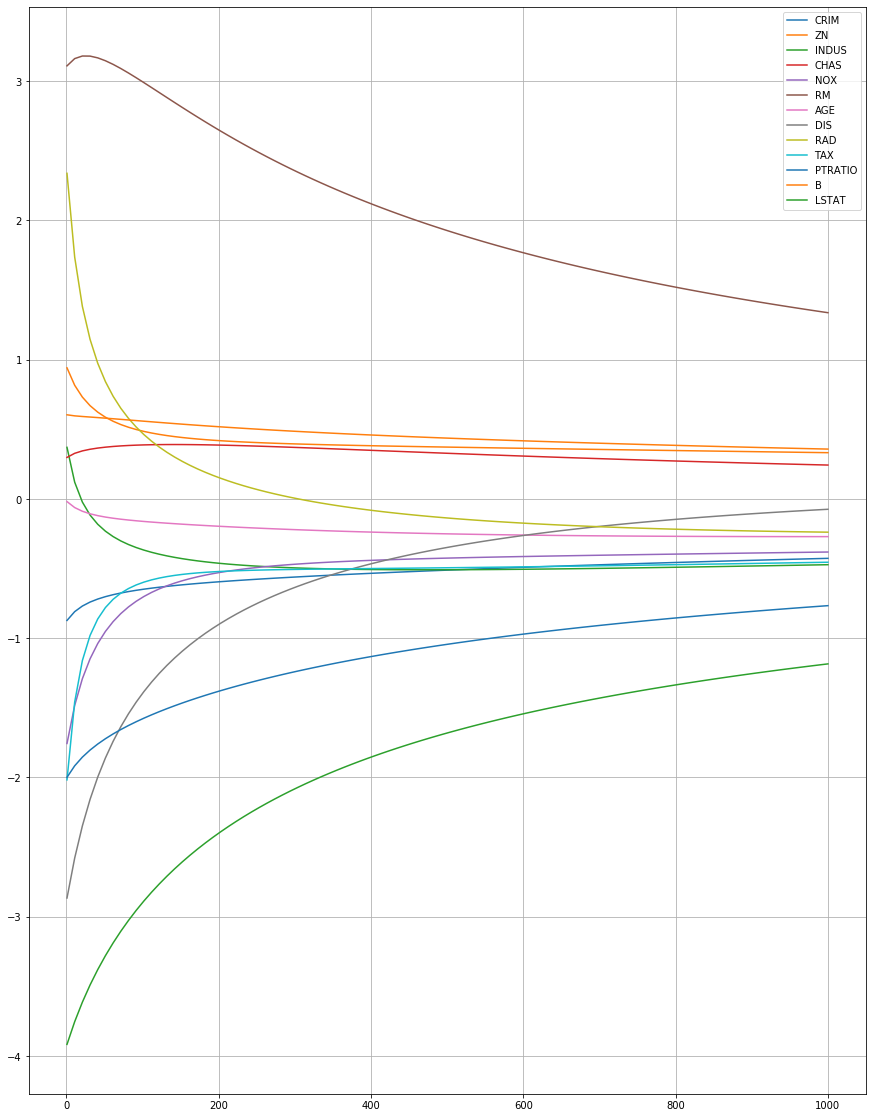

In [58]:
alphas = np.linspace(1, 1000, 100)# 

weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.figure(figsize=(15,20))
plt.plot(alphas, weights.T)
plt.legend(col)
plt.grid()
plt.show()

In [ ]:
#На графике видим, что   RAD  и  TAX быстро начинают падать.Повияет ли регуляризация на качество модели? 

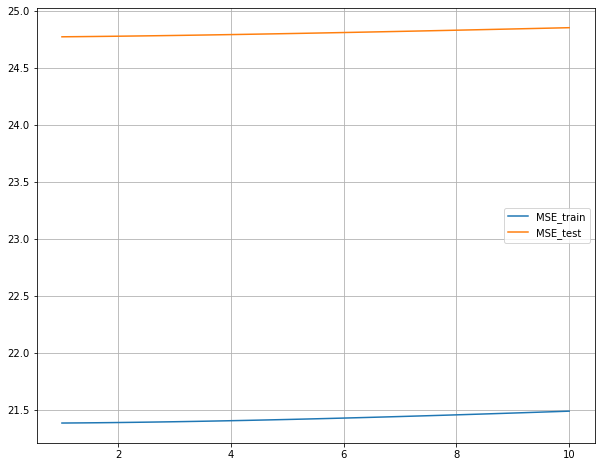

In [62]:
alphas = np.linspace(1, 10, 100)# 

#MSE = np.empty((1, 0))
MSE_train = np.empty(0)
MSE_test = np.empty(0)
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    
    #weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
    y_train_prediction = ridge_regressor.predict(X_train)
    MSE_train= np.hstack((MSE_train, mean_squared_error(y_train, y_train_prediction)))
    y_test_prediction = ridge_regressor.predict(X_test)
    MSE_test=np.hstack((MSE_test, mean_squared_error(y_test, y_test_prediction)))
plt.figure(figsize=(10,8))
plt.plot(alphas, MSE_train.T,label='MSE_train' )
plt.plot(alphas,  MSE_test.T,label='MSE_test' )
plt.legend( )
plt.grid()
plt.show()

In [ ]:
#MSE train и  MSE test примерно соответствуют первоначальному расчету.Также Test MSE >Train MSE


In [59]:
#Значения первоначального расчета
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

Train MSE:  21.380655966729467
Test MSE:  24.768530968608644


In [ ]:
#Вывод: При подаче в модель линейной регрессии набора данных фиксированных значений - random_state=123
#ни поочередное  удаление сильнокоррелируемых фичей, ни регуляризация не повлияли на улучшение качества модели. 
#Необходимо в дальнейшем попробовать подать другой набор данных random_state=nnn. 
#В случае расхождения по результату попробовать:
#- проанализировать данные (на предмет выбросов)*
#- сделать кросс-валидацию*

#*Планируется сделать  в ДЗ №2 Титаник